In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
## get the data 

bull_dozer = pd.read_csv("data/TrainAndValid.csv",
                         low_memory=False,
                         parse_dates=["saledate"])

In [3]:
len(bull_dozer)

412698

In [4]:
## reduce the data and only use 200000 rows 

bull_dozer = bull_dozer.iloc[:200000]
len(bull_dozer)

200000

We reduced the data as my laptop had memory issues


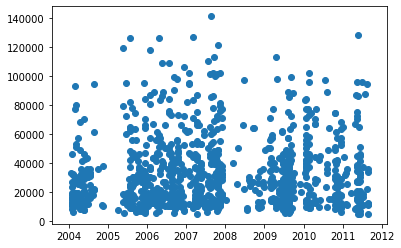

In [5]:
# plot saledate vs saleprice 

fig,ax = plt.subplots()
plt.scatter(bull_dozer["saledate"][:1000],bull_dozer["SalePrice"][:1000])

In [6]:
# arrange saledate in ascending order 

bull_dozer.sort_values(by=["saledate"],inplace=True,ascending=True)

In [7]:
bull_dozer.saledate

135376   1989-01-31
81383    1989-01-31
77792    1989-01-31
169297   1989-01-31
54653    1989-01-31
            ...    
23967    2011-12-29
23968    2011-12-29
23970    2011-12-29
23971    2011-12-29
23972    2011-12-29
Name: saledate, Length: 200000, dtype: datetime64[ns]

In [8]:
## feature engineering 

## add our own features 

bull_dozer["saleyear"] = bull_dozer["saledate"].dt.year
bull_dozer["salemonth"] = bull_dozer["saledate"].dt.month
bull_dozer["saleday"] = bull_dozer["saledate"].dt.day
bull_dozer["saledayofweek"] = bull_dozer["saledate"].dt.dayofweek
bull_dozer["saledayofyear"] = bull_dozer["saledate"].dt.dayofyear

In [9]:
bull_dozer_temp = bull_dozer.copy()

In [10]:
bull_dozer_temp.head().T

,135376,81383,77792,169297,54653
SalesID,1493279,1379228,1369631,1596358,1301884
SalePrice,63000,31000,21000,19000,23500
MachineID,1363756,1082797,1175092,1433229,1182999
ModelID,2759,7620,4146,8247,4123
datasource,132,132,132,132,132
auctioneerID,99,99,99,99,99
YearMade,1987,1986,1972,1978,1976
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [11]:
## check for datatypes 

bull_dozer_temp.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

In [12]:
## object doesnt show whether datatype is string or category

# check whether the column is string or not 

pd.api.types.is_string_dtype(bull_dozer_temp["state"])

True

In [13]:
## we need to check for every column so will use loops 

for label,content in bull_dozer_temp.items():
    if(pd.api.types.is_string_dtype(content)):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [14]:
## convert all this string to category 

for label,content in bull_dozer_temp.items():
    if(pd.api.types.is_string_dtype(content)):
        bull_dozer[label] = content.astype('category').cat.as_ordered()
        

In [15]:
## we have now converted string to category 

bull_dozer.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                         category
saledate                    datetime64[ns]
fiModelDesc                       category
fiBaseModel                       category
fiSecondaryDesc                   category
fiModelSeries                     category
fiModelDescriptor                 category
ProductSize                       category
fiProductClassDesc                category
state                             category
ProductGroup                      category
ProductGroupDesc                  category
Drive_System                      category
Enclosure                         category
Forks                             category
Pad_Type   

In [16]:
bull_dozer["state"].cat.codes

135376     8
81383      8
77792      8
169297     8
54653      8
          ..
23967     10
23968      4
23970      4
23971     43
23972     43
Length: 200000, dtype: int8

## fillig missing values 

### fill numeric values first

##### check for columns which are numeric 

In [17]:
for label,content in bull_dozer_temp.items():
    if(pd.api.types.is_numeric_dtype(content)):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
salemonth
saleday
saledayofweek
saledayofyear


In [18]:
## shows numeric values 

## check for missing values in numeric colums 


for label,content in bull_dozer_temp.items():
    if(pd.api.types.is_numeric_dtype(content)):
        if(pd.isnull(content).sum()):
            print(label)

MachineHoursCurrentMeter


In [19]:
## fill the missing values with median 

for label,content in bull_dozer_temp.items():
    if(pd.api.types.is_numeric_dtype(content)):
        ## add a binary columns showing whether it has missing values or not
        bull_dozer_temp[label + "_missing"] = pd.isnull(content)
        ## fill the missing values 
        bull_dozer_temp[label] = content.fillna(content.median())

In [20]:
## check for missing values 

bull_dozer_temp.isna().sum()

SalesID                  0
SalePrice                0
MachineID                0
ModelID                  0
datasource               0
                        ..
saleyear_missing         0
salemonth_missing        0
saleday_missing          0
saledayofweek_missing    0
saledayofyear_missing    0
Length: 71, dtype: int64

In [21]:
## we have filled all numeric columns now will fill and turn category columns into numbers

for label,content in bull_dozer_temp.items():
    if not(pd.api.types.is_numeric_dtype(content)):
        ## add a binary showing whether had missing values or not 
        bull_dozer_temp[label +"_missing"] = pd.isnull(content)
        ## fill and turn category column
        bull_dozer_temp[label] = pd.Categorical(content).codes + 1

we have filled missing values and made column to numeric 

In [22]:
bull_dozer_temp.isna().sum()

SalesID                      0
SalePrice                    0
MachineID                    0
ModelID                      0
datasource                   0
                            ..
Backhoe_Mounting_missing     0
Blade_Type_missing           0
Travel_Controls_missing      0
Differential_Type_missing    0
Steering_Controls_missing    0
Length: 116, dtype: int64

In [23]:
bull_dozer_temp.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
                              ...   
Backhoe_Mounting_missing        bool
Blade_Type_missing              bool
Travel_Controls_missing         bool
Differential_Type_missing       bool
Steering_Controls_missing       bool
Length: 116, dtype: object

### Modelling 



In [24]:
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# fit the model 

model.fit(bull_dozer_temp.drop("SalePrice",axis=1), bull_dozer_temp["SalePrice"])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [25]:
%%time
model.score(bull_dozer_temp.drop("SalePrice",axis=1), bull_dozer_temp["SalePrice"])

Wall time: 5.27 s


0.9882916118933339

This model we can say as perfect model because it is training and evaluating score on same data that he trained

we need train valid and test split to evaluate the actual model

In [26]:
## split into train and valid set 

bull_dozer_valid = bull_dozer_temp[bull_dozer_temp["saleyear"]==2009]

In [27]:
len(bull_dozer_valid)

10746

In [28]:
bull_dozer_train = bull_dozer_temp[bull_dozer_temp["saleyear"]!=2009]

In [29]:
len(bull_dozer_train)

189254

In [30]:
X_train,y_train = bull_dozer_train.drop("SalePrice",axis=1),bull_dozer_train["SalePrice"]
X_valid,y_valid = bull_dozer_valid.drop("SalePrice",axis=1),bull_dozer_valid["SalePrice"]

In [31]:
len(X_train),len(y_train),len(X_valid),len(y_valid)

(189254, 189254, 10746, 10746)

In [32]:
len(X_train)

189254

In [33]:
# create a evaluation function (we require rmsle)

from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(y_true,y_preds):
    """
    calculates root mean-squared-log-error betwween predictions and true labels 
    """
    return np.sqrt(mean_squared_log_error(y_true,y_preds))

def show_scores(model):
    
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    
    scores = {"Training MSE":mean_absolute_error(y_train,train_preds),
              "Validation MSE":mean_absolute_error(y_valid,valid_preds),
              "Training RMSLE":rmsle(y_train,train_preds),  ## rmsle is function we created above
              "Validation RMSLE":rmsle(y_valid,valid_preds),
              "Training_r2":r2_score(y_train,train_preds),
              "Validation_r2":r2_score(y_valid,valid_preds)}
    return scores

In [34]:
%%time
model.fit(X_train,y_train)

Wall time: 2min 56s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [35]:
show_scores(model)

{'Training MSE': 1581.9750584928192,
 'Validation MSE': 6150.781970035362,
 'Training RMSLE': 0.0790237670329395,
 'Validation RMSLE': 0.25808096650539336,
 'Training_r2': 0.988365865323451,
 'Validation_r2': 0.8417314484705533}

### Hyper parameter tuning with randomizedsearchCV



In [36]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rs_grid = {"n_estimators":np.arange(10,100,10),
           "max_features":[0.5,1,"sqrt","auto"],
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(2,20,2),
           "max_samples":[1000]  ## will work on this no of samples
           }

rs_model = RandomizedSearchCV(estimator=model,
                              param_distributions=rs_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

 

## fit the model 

rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.1min finished


Wall time: 1min 8s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [37]:
## evaluate the score by using method that created above 

show_scores(rs_model)

{'Training MSE': 9212.153215656806,
 'Validation MSE': 11852.563464021161,
 'Training RMSLE': 0.3747553236129478,
 'Validation RMSLE': 0.5019042752272114,
 'Training_r2': 0.6777921018221564,
 'Validation_r2': 0.5592714829610719}

In [38]:
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 16,
 'min_samples_leaf': 4,
 'max_samples': 1000,
 'max_features': 'auto',
 'max_depth': 5}

## Train a model with best hyperparameters 

Note: These we're found after 100 iterations of `RandomizedSearchCV`

In [39]:
%%time
ideal_model = RandomForestRegressor(n_estimators=40,
                                    max_features=0.5,
                                    min_samples_split=14,
                                    min_samples_leaf=1,
                                    max_samples=None,
                                    n_jobs=-1)
# fit the ideal model 

ideal_model.fit(X_train,y_train)

Wall time: 38.2 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [40]:
# evaluate the score 

show_scores(ideal_model)

{'Training MSE': 2891.676323133518,
 'Validation MSE': 6591.299740671496,
 'Training RMSLE': 0.1335436536821506,
 'Validation RMSLE': 0.2738328062694991,
 'Training_r2': 0.9627960677863631,
 'Validation_r2': 0.8312891786356614}

### Make Predictions on test data 


In [41]:
# import test daata 

df_test = pd.read_csv("data/Test.csv",
                      parse_dates=["saledate"])

In [42]:
len(df_test)

12457

In [43]:
# predict on test data set as it doesnt contains sale Price

test_preds = ideal_model.predict(df_test)

ValueError: could not convert string to float: 'Low'

## this error is because as we preprocessed trainandvalid.csv data set smiliarly we need to process test.csv

In [109]:
def preprocessing(df):
    df["saleyear"] = df["saledate"].dt.year
    df["salemonth"] = df["saledate"].dt.month
    df["saleday"] = df["saledate"].dt.day
    df["saledayofweek"] = df["saledate"].dt.dayofweek
    df["saledayofyear"] = df["saledate"].dt.dayofyear
    
    # fill numeric rows with median 
    
    for label,content in df.items():
        if(pd.api.types.is_numeric_dtype(content)):
            if(pd.isnull(content).sum()):
                # add a binary column
                df[label + "_missing"] = pd.isnull(content)
                # fill missing values with median
                df[label] = content.fillna(content.median())
                
        # fill categorical values and turn them into numbers
            if not(pd.api.types.is_numeric_dtype(content)):
                # add a binary column 
                df[label + "_missing"] = pd.isnull(content)
                # fill categorical values and turn into numbers 
                df[label] = pd.Categorical(content).codes +1
                
    return df
    
    

In [110]:
# process the test data 
# with help of method created above makep df_test

df_test = preprocessing(df_test)
df_test.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [83]:
def preprocessing(df):
    df["saleyear"] = df["saledate"].dt.year
    df["salemonth"] = df["saledate"].dt.month
    df["saleday"] = df["saledate"].dt.day
    df["saledayofweek"] = df["saledate"].dt.dayofweek
    df["saledayofyear"] = df["saledate"].dt.dayofyear
    
    # remove saledate column 
    
    df.drop("saledate",axis=1,inplace=True)
    
    # fill numeric rows with median 
    
    for label,content in df.items():
        if(pd.api.types.is_numeric_dtype(content)):
            if(pd.isnull(content).sum()):
                # add a binary column
                df[label + "_missing"] = pd.isnull(content)
                # fill missing values with median
                df[label] = content.fillna(content.median())
                
        # fill categorical values and turn them into numbers
            if not(pd.api.types.is_numeric_dtype(content)):
                # add a binary column 
                df[label + "_missing"] = pd.isnull(content)
                # fill categorical values and turn into numbers 
                df[label] = pd.Categorical(content).codes +1
                
    return df
    

In [84]:
df_test = preprocessing(df_test)
df_test.head()

KeyError: 'saledate'

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [48]:
def preprocessing(df):
    df["saleyear"] = df["saledate"].dt.year
    df["salemonth"] = df["saledate"].dt.month 
    df["saleday"] = df["saledate"].dt.day
    df["saledayofweek"] = df["saledate"].dt.dayofweek
    df["saledayofyear"] = df["saledate"].dt.dayofyear
    
    #df.drop("saledate",axis=1,inplace=True)
    
    # fill numeric columns 
    
    for label,content in df.items():
        if(pd.api.types.is_numeric_dtype(content)):
            if(pd.isnull(content).sum()):
                # add a binary column  
                df[label +"_missing"] = pd.isnull(content)
                # fill the missing values with median 
                df[label] = content.fillna(content.median())
        if not(pd.api.types.is_numeric_dtype(content)):
            if(pd.isnull(content).sum()):
                df[label + "_missing"] = pd.isnull(content)
                # fill and turn categorical columns 
                df[label] = pd.Categorical(content).codes +1
    return df

## We are not able to predict the test data will work in the next file upto before everything is correct